In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
from math import pi
from math import sin
from math import cos
from PlotMaker import PlotMaker
from Network import RemapNetwork
from GridSearch import GridSearch
from InputGenerator import InputGenerator

In [2]:
plotmaker = PlotMaker()
inputgenerator = InputGenerator()

## Remapping Network

In [33]:
#### N = 100
N = 100
K_inhib = 0.01
network = RemapNetwork(N, K_inhib)
input_ext = inputgenerator.get_constant_input(
    network, [0, 50], peaktype="exp"
    )
alphas = np.ones(input_ext.shape[0])*0.6
alphas[500:] = 0
m, f = network.simulate(input_ext, alphas)

# Get reremapper
reremap_order = np.arange(network.N)
for idx, val in enumerate(network.remap_order):
    reremap_order[val] = idx

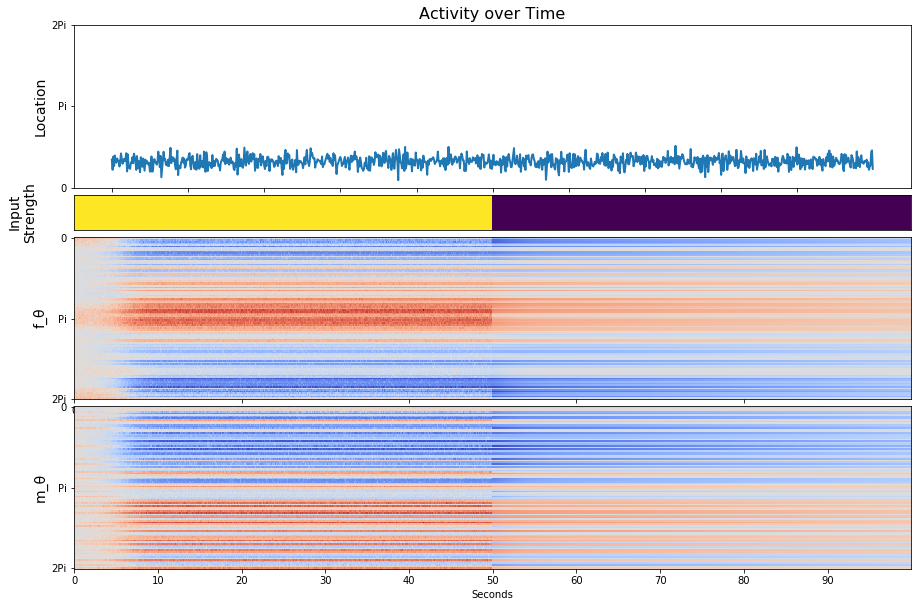

In [34]:
plotmaker.plot_main(
    input_ext[:,0], alphas, f, m=f[reremap_order,:]
    )

In [6]:
def _make_ring(network):
    cmap = cm.get_cmap('hsv', N)
    for context in range(2):
        plt.figure(figsize=(3,3))
        for unit in range(N):
            angle = network.thetas[unit, context]
            cmap_idx = unit/N
            x = cos(angle)
            y = sin(angle)
            plt.scatter(x, y, color=cmap(cmap_idx))
        plt.xticks([])
        plt.yticks([])
        plt.xlim([-1.1, 1.1])
        plt.ylim([-1.1, 1.1])

In [ ]:
_make_ring(network)

In [ ]:
plt.imshow(network.J)

In [ ]:
Js = np.zeros(network.J.shape)

for i in range(Js.shape[0]):
    for j in range(Js.shape[1]):
        Js[network.remap_order[i], network.remap_order[j]] = network.J[i, j]

plt.imshow(Js)        